#**Laboratorio 6: Monte Carlo - 21 Blackjack**
#Grupo 10

* Julian David Puentes Gil
* Gustavo Alberto Puentes Romero


###Importacion de las librerias necearias

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

###Declaracion de barajas

Para uso futuro, aqui se declararan los 4 tipos de barajas que se usaran en el laboratorio, y seran referenciadas en cada punto

In [2]:
  Baraja_completa_espanola_estandar =  [1,2,3,4,5,6,7,8,9, 10,11,12,
                                        1,2,3,4,5,6,7,8,9, 10,11,12,
                                        1,2,3,4,5,6,7,8,9, 10,11,12,
                                        1,2,3,4,5,6,7,8,9, 10,11,12]

Baraja_completa_espanola_regla_de_10 = [1,2,3,4,5,6,7,8,9,10,10,10,
                                        1,2,3,4,5,6,7,8,9,10,10,10,
                                        1,2,3,4,5,6,7,8,9,10,10,10,
                                        1,2,3,4,5,6,7,8,9,10,10,10]


Baraja_completa_poker_estandar = [1,2,3,4,5,6,7,8,9, 10,11,12,13,
                                  1,2,3,4,5,6,7,8,9, 10,11,12,13,
                                  1,2,3,4,5,6,7,8,9, 10,11,12,13,
                                  1,2,3,4,5,6,7,8,9, 10,11,12,13] 

Baraja_completa_poker_regla_de_10 =[1,2,3,4,5,6,7,8,9,10,10,10,10,
                                    1,2,3,4,5,6,7,8,9,10,10,10,10,
                                    1,2,3,4,5,6,7,8,9,10,10,10,10,
                                    1,2,3,4,5,6,7,8,9,10,10,10,10]


##Funcion-procedimiento Montecarlo


Definimos la funcion generica de 'Montecarlo', la cual recibe como parametros la cantidad de experimentos (nexp), la baraja con la que se juega(Tipo_baraja),y que cartas ya tiene en la mano el jugador (Cartas_iniciales_jugador) 

La ejecucion de esta funcion imprime los valores de probabilidad, numero de cartas tomadas y su grafica de frecuencia en relacion a la probabilidad de sacar 21 segun los parametros ingresados.



In [3]:
def Montecarlo(nexp,Tipo_de_baraja,Cartas_iniciales_jugador):

  #Declaracion de variables auxiliares
  numero_de_experimentos=nexp
  Partidas_exitosas = 0

  Acumulador_numero_de_cartas_partidas_exitosas = 0

  Ocurrencia_numero_de_cartas_partidas_ganadas = []


  #ITERAR EL NUMERO DE EXPERIMENTOS QUE SE INDICO
  for i in range(numero_de_experimentos):

    #Inicializar la baraja 
    Baraja_experimento_i = Tipo_de_baraja.copy()
    #Inicializar las cartas del jugador
    Cartas_del_jugador = Cartas_iniciales_jugador.copy()
    #Inicializar el contador de cartas tomadas
    Cartas_tomadas = len(Cartas_iniciales_jugador)
                
                
                
    #evaluar si el jugador ya se paso de 21, si no es asi, se seguira ejecutando el experimento i
    while(sum(Cartas_del_jugador)<21):

      #Elegir una carta aleatoria de la baraja 
      Carta_nueva = random.choice(Baraja_experimento_i)
                  

      #Quitar la carta de la baraja
      Baraja_experimento_i.remove(Carta_nueva)
                  

      #Agregar la carta a la mano del jugador
      Cartas_del_jugador.append( Carta_nueva)
      Cartas_tomadas = Cartas_tomadas +1

      #Si se obtiene 21 se actualizan los acumuladores y contadores
      if (sum(Cartas_del_jugador) == 21):
        Partidas_exitosas =  Partidas_exitosas +1
        Acumulador_numero_de_cartas_partidas_exitosas = Acumulador_numero_de_cartas_partidas_exitosas +  Cartas_tomadas
        Ocurrencia_numero_de_cartas_partidas_ganadas.append(Cartas_tomadas)


  #Impresion de los resultados
  print("Considerando",numero_de_experimentos,"experimentos, los resultados obtenidos son:\n",)

  print("     Probabilidad de obtener 21 = ",Partidas_exitosas/numero_de_experimentos)


  if(Partidas_exitosas>0):

    print("     Promedio de cartas tomadas en las partidas exitosas = ",Acumulador_numero_de_cartas_partidas_exitosas / Partidas_exitosas,"\n\n\n")

    

    #Dibujo de la grafica de la ocurrencia en el numero de cartas tomadas por el jugador cuando obtuvo 21
    arreglo_ocurrencia = np.array(Ocurrencia_numero_de_cartas_partidas_ganadas)
    plt.hist(arreglo_ocurrencia, bins=np.arange(arreglo_ocurrencia.min(),arreglo_ocurrencia.max()+3))


#**Punto #1**

Estimate the probability of getting a 21, the average number of cards required to complete 21 and plot the experimental distribution of the number of card required to complete 21 drawing cards sequentially from a shuffled Spanish 48-card deck with card values [1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12] and from a shuffled Poker 52-card with card values [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13] using Montecarlo with 10 millions simulations.

##Parte A: probabilidad de obtener 21 con Baraja completa espanola estandar

Corremos el metodo de Montecarlo, definido previamente, indicando que se realizen 10M experimentos,se vayan retirando cartas de una baraja completa espanola estandar , y que el jugador inicia sin ninguna carta.

Baraja completa espanola: 

Considerando 10000000 experimentos, los resultados obtenidos son:

     Probabilidad de obtener 21 =  0.1576302
     Promedio de cartas tomadas en las partidas exitosas =  3.415654487528405 





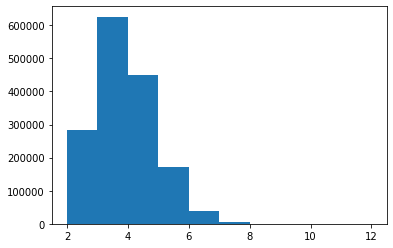

In [4]:
print("Baraja completa espanola: \n")
Montecarlo(10000000,Baraja_completa_espanola_estandar,[])

##Parte B: probabilidad de obtener 21 con una baraja completa de poker estandar 

Corremos el metodo de Montecarlo, definido previamente, indicando que se realizen 10M experimentos,se vayan retirando cartas de una baraja completa de poker estandar , y que el jugador inicia sin ninguna carta.

Baraja completa Poker: 

Considerando 10000000 experimentos, los resultados obtenidos son:

     Probabilidad de obtener 21 =  0.144702
     Promedio de cartas tomadas en las partidas exitosas =  3.214863650813396 





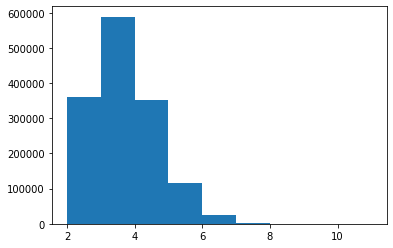

In [5]:
print("Baraja completa Poker: \n")
Montecarlo(10000000,Baraja_completa_poker_estandar,[])

#**Punto #2**

Estimate the probability of getting a 21, the average number of cards required to complete 21 and plot the experimental distribution of the number of card required to complete 21 drawing cards sequentially from a shuffled Spanish 48-card deck with card values [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10] and from a shuffled Poker 52-card deck with card values [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10] using Montecarlo with 10 millions simulations.

##Parte A: probabilidad de obtener 21 con una baraja completa espanola usando regla de 10

Corremos el metodo de Montecarlo, definido previamente, indicando que se realizen 10M experimentos,se vayan retirando cartas de una baraja completa espanola donde se aplica regla de 10, y que el jugador inicia sin ninguna carta.

Baraja espanola version regla de 10: 

Considerando 10000000 experimentos, los resultados obtenidos son:

     Probabilidad de obtener 21 =  0.1495987
     Promedio de cartas tomadas en las partidas exitosas =  3.698401790924654 





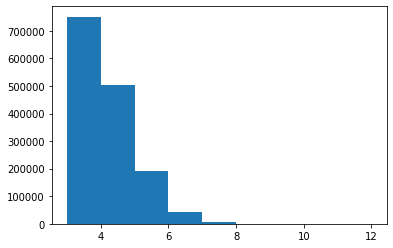

In [6]:
print("Baraja espanola version regla de 10: \n")
Montecarlo(10000000,Baraja_completa_espanola_regla_de_10,[])

##Parte B: probabilidad de obtener 21 con una baraja completa de poker usando regla de 10

Corremos el metodo de Montecarlo, definido previamente, indicando que se realizen 10M experimentos,se vayan retirando cartas de una baraja completa de poker donde se aplica regla de 10, y que el jugador inicia sin ninguna carta.



Baraja de poker version regla de 10: 

Considerando 10000000 experimentos, los resultados obtenidos son:

     Probabilidad de obtener 21 =  0.1400756
     Promedio de cartas tomadas en las partidas exitosas =  3.5776780538509203 





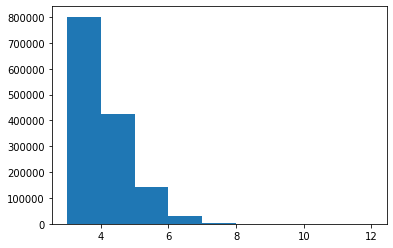

In [7]:
print("\n\nBaraja de poker version regla de 10: \n")
Montecarlo(10000000,Baraja_completa_poker_regla_de_10,[])

#**Punto #3**

Para este punto crearemos algunas funciones auxiliares y luego mediante estas y el Metodo Montecarlo declarado al inicio del notebook realizaremos la solucion.

Despues de una seccion donde se explican estas funciones auxiliares, se encuentra el enunciado del problema y la solucion.

##||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

##Funciones auxiliares

Para el punto 3 es necesario establecer algunas funciones auxiliares para hacer la simulacion correctamente. Esto debido a que necesitamos generar una baraja con n/2 cartas (es decir con 24 o 26 cartas segun el tipo de baraja) a partir de una baraja completa de donde el jugador ya retiro 7,7 y 5.




*   eliminar_cartas_jugador: como su nombre especifica, dada una baraja,le elimina las cartas que el jugador ya tenga

*   eliminar_n_cartas: elimina una cantidad especifica de cartas de la baraja de manera aleatoria

* armar_media_baraja: dado un tipo de baraja que completa tendria n cartas, se genera una baraja donde hayan n/2 cartas y no esten las cartas que el jugador ya retiro.


Gracias a agregar estas funciones podemos seguir haciendo uso del Metodo Montecarlo definido desde el principio.

###eliminar_cartas_jugador:

In [8]:
#funcion auxiliar para eliminar las cartas que tenga el jugador
def eliminar_cartas_jugador(cartas_jugador,Baraja):
  
  #variables auiliares con las que se eliminara los valores deseados
  baraja_aux=Baraja.copy()
  cartas_jugador_aux=cartas_jugador.copy()

  #se recorre la baraja de cartas del jugador, eliminando cada una de la baraja principal
  for i in range(len(cartas_jugador_aux)):
    baraja_aux.remove(cartas_jugador[i])
  return baraja_aux

In [9]:
#Ejemplo
print("Con una lista de enteros de 1 a 10, si quitamos los pares quedan",eliminar_cartas_jugador([2,4,6,8,10],[1,2,3,4,5,6,7,8,9,10]))

Con una lista de enteros de 1 a 10, si quitamos los pares quedan [1, 3, 5, 7, 9]


###eliminar_n_cartas:

In [10]:
def eliminar_n_cartas(n,baraja):
  baraja_aux=baraja.copy()
  for i in range(n):
    baraja_aux.remove(random.choice(baraja_aux))
  return baraja_aux

In [11]:
#Ejemplo
Baraja_ejemplo_borrado = [1,2,3,4,5,6,7,8,9,10]
print("La baraja tenia un numero de cartas igual a",len(Baraja_ejemplo_borrado))
print("Despues de quitar 5 quedan en total",len(eliminar_n_cartas(5,[1,2,3,4,5,6,7,8,9,10])))

La baraja tenia un numero de cartas igual a 10
Despues de quitar 5 quedan en total 5


###Armar media baraja:

In [12]:
#Armar media baraja
def armar_media_baraja(tipo_de_baraja, cartas_no_disponibles):
  
  #eliminar de la baraja las cartas que ya posea el jugador
  Media_baraja = eliminar_cartas_jugador(cartas_no_disponibles,tipo_de_baraja)

  #Generar una baraja de n/2 cartas. El jugador ya quito m <= n/2, entonces basta quitar (m/2)-m para que quede la otra mitad
  n_medios = len(tipo_de_baraja)/2
  Media_baraja = eliminar_n_cartas(  ( int(n_medios)-len(cartas_no_disponibles) )  , Media_baraja)

  return Media_baraja
        

In [13]:
#ejemplo
print("Usando una baraja inicial",[1,2,3,4,5,6,7,8,9,10,11,12],"\n",
      "Si queremos obtener n/2 cartas, entre las cuales no pueden estar",[1,2],"\n",
      "una nueva baraja que podemos usar es",armar_media_baraja([1,2,3,4,5,6,7,8,9,10,11,12],[1,2]))

Usando una baraja inicial [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 
 Si queremos obtener n/2 cartas, entre las cuales no pueden estar [1, 2] 
 una nueva baraja que podemos usar es [3, 4, 7, 8, 11, 12]


##||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

**Enunciado del punto 3**

Estimate the probability of getting a 21, the average total number of cards required to complete 21 and lot the experimental distribution of the number of card required to complete 21; assuming that you have in your hand the cards [7,7,5] and the remaining deck has n/2 cards for the regular Spanish 48-card deck and the Poker 52-card decks. You can pick the n/2 cards in the remaining deck in whatever way you choose but with restriction that this has maximum two 7s and three 5, you have to keep the remaining deck fixed through the Montecarlo simulations, use 10 million simulations.

##Parte A: probabilidad de obtener 21 en una partida donde el jugador inicia con [7,7,5] y se toman cartas de una media baraja espanola estandar

Media baraja usada = [2, 5, 8, 10, 11, 12, 2, 5, 6, 8, 10, 11, 12, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12] 

Probabilidad teorica de obtener 21 = 0.125 


Considerando 10000000 experimentos, los resultados obtenidos son:

     Probabilidad de obtener 21 =  0.1249717
     Promedio de cartas tomadas en las partidas exitosas =  4.0 





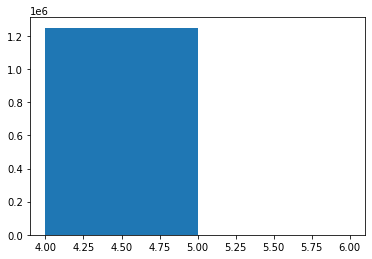

In [14]:
#Generamos una baraja de 24 cartas a partir de Baraja_completa_espanola_estandar, con la restriccion de que a lo mas hayan dos 7 y tres 5
Baraja_del_juego = armar_media_baraja(Baraja_completa_espanola_estandar,[7,7,5])
print("Media baraja usada =",Baraja_del_juego,"\n")

#Calculamos la probabilidad teorica de obtener 21 si el jugador tiene tiene [7,7,5] de suma 19 y usando la media baraja generada.
prob_teorica = Baraja_del_juego.count(2)/len(Baraja_del_juego) + Baraja_del_juego.count(1)*(Baraja_del_juego.count(1)-1)/(len(Baraja_del_juego)*(len(Baraja_del_juego)-1))
print("Probabilidad teorica de obtener 21 =",prob_teorica,"\n\n")


#Corremos el metodo de montecarlo usando la media baraja generada e indicando las cartas iniciales del jugador
Montecarlo(10000000,Baraja_del_juego,[7,7,5])

##Parte B: probabilidad de obtener 21 en una partida donde el jugador inicia con [7,7,5] y se toman cartas de una media baraja de poker estandar

Media baraja usada = [12, 1, 8, 11, 12, 13, 1, 2, 4, 8, 9, 11, 12, 13, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13] 

Probabilidad teorica de obtener 21 = 0.08615384615384616 


Considerando 10000000 experimentos, los resultados obtenidos son:

     Probabilidad de obtener 21 =  0.0861215
     Promedio de cartas tomadas en las partidas exitosas =  4.1075515405560745 





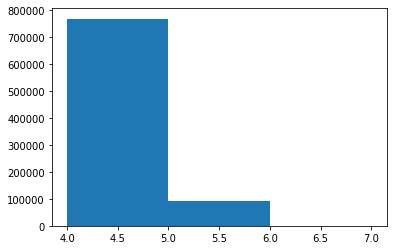

In [15]:
#Generamos una baraja de 26 cartas a partir de Baraja_completa_poker_estandar, con la restriccion de que a lo mas hayan dos 7 y tres 5
Baraja_del_juego = armar_media_baraja(Baraja_completa_poker_estandar,[7,7,5])
print("Media baraja usada =",Baraja_del_juego,"\n")

#Calculamos la probabilidad teorica de obtener 21 si el jugador tiene tiene [7,7,5] de suma 19 y usando la media baraja generada.
prob_teorica = Baraja_del_juego.count(2)/len(Baraja_del_juego) + Baraja_del_juego.count(1)*(Baraja_del_juego.count(1)-1)/(len(Baraja_del_juego)*(len(Baraja_del_juego)-1))
print("Probabilidad teorica de obtener 21 =",prob_teorica,"\n\n")


#Corremos el metodo de montecarlo usando la media baraja generada e indicando las cartas iniciales del jugador
Montecarlo(10000000,Baraja_del_juego,[7,7,5])

##**Punto #4**

Estimate and calculate analytically the probability of getting a 21, the average total number of cards required to complete 21 and the experimental distribution of the number of card required to complete 21; assuming that you have in your hand the cards [7,7,5] and the remaining deck has two possible sets of 8 cards for the regular Spanish 48-card deck and the Poker 52-card decks. The two possible remaining decks are a (hot deck) that contains four 1 cards and four 2 cards a (cold deck) with not 1 or 2 cards, for the estimations use Montecarlo with 10 million simulations.






##Decks especiales

Para este punto, es necesario usar el metodo de Montecarlo con unos Decks predefinidos.

Esto es posible ya que el criterio para que que un Deck sea caliente es que simplemente debe tener todos los 1 y todos los 2. El motivo de esto es que el jugador tiene [7,7,5] cuya suma es 19 y por tanto solo sacar uno o dos lleva a obtener 21.

Como Deck frio se considera cualquier Deck que no tenga ni 1 ni 2, lo que intuitivamente es causa de que el jugador se sobrepase de 21.



In [16]:
Hot_deck_8 = [1,1,1,1,
              2,2,2,2]

Hot_deck_10 = [1,1,1,1,
               2,2,2,2,
               3,3]

Hot_deck_12 = [1,1,1,1,
               2,2,2,2,
               3,3,3,3]


Cold_deck_8 = [10,10,10,10,
               9,9,9,9]

Cold_deck_10 = [10,10,10,10,
               9,9,9,9,
               8,8]

Cold_deck_12 = [10,10,10,10,
               9,9,9,9,
               8,8,8,8]

#8 cartas restantes:

In [17]:
#Probablidad analitica teniendo [7,7,5] y un Hot deck de 8 cartas de obtener 21

#dos unos o un dos
print(((4/8)*(3/7)) + (4/8))

0.7142857142857143


Considerando 10000000 experimentos, los resultados obtenidos son:

     Probabilidad de obtener 21 =  0.7142276
     Promedio de cartas tomadas en las partidas exitosas =  4.299706144091883 





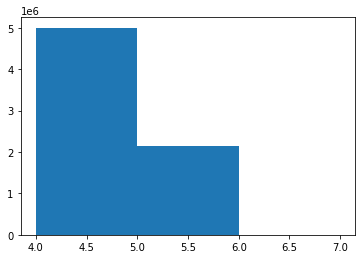

In [18]:
Montecarlo(10000000,Hot_deck_8,[7,7,5])

In [19]:
Montecarlo(10000000,Cold_deck_8,[7,7,5])

Considerando 10000000 experimentos, los resultados obtenidos son:

     Probabilidad de obtener 21 =  0.0


##**Punto #5**

Estimate the average amount of money (expected value) that Ben wins or losses on a weekend if Ben goes to Vegas every weekend (Friday, Saturday and Sunday), plays every weekend day 10 hours, each game takes 3 mins. 

Assume that for each game he gets two possibilities, in one he gets in his hand the cards [7,7,5] and a remaining hot deck cards with 12 cards 8 cards in which case he bets $1000 this happens with probability 1/10; in the other one he gets no cards in his hand a complete shuffled deck in which case he bets 10, this happens with the remaining probability 9/10. 

Use 10000 Montecarlo simulations to estimated the expected amount of money that Ben wins or losses on a weekend for the Spanish 48-card deck and for a Poker 52-card deck .



*   Función FindeSemana adaptada para el caso de Ben:



In [20]:
def FindeSemana(nexp, baraja):
  
  #Declaracion de variables auxiliares
  total_dinero = 0
  numero_de_experimentos=nexp
  Partidas_exitosas = 0

  Acumulador_numero_de_cartas_partidas_exitosas = 0

  Ocurrencia_numero_de_cartas_partidas_ganadas = []

  probabilidad_hot_deck = 1/10


  #ITERAR EL NUMERO DE PARTIDAS QUE SE INDICO
  for i in range(numero_de_experimentos):


    #-----------------------------------------------------------------------
    # Cálculo de probabilidad para el Hot Deck

    #Se genera un numero aleatorio de 0 a 1. Mas adelante, si el numero es menor o igual a 0.1 entonces, el juego actual
    #entra en el 10% de juegos en que salieron Hot decks

    probabilidad  = random.random()

    #------------------------------------------------------------------------





#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>.
# Selección de barajas y cartas iniciales de acuerdo a la probabilidad calculada


    #Caso HotDeck
    if (probabilidad <= probabilidad_hot_deck):
      Tipo_de_baraja = Hot_deck_8
      Cartas_iniciales_jugador = [7,7,5]


    else:
       #Caso NO HotDeck con baraja de poker estandar y mano vacia
      if (baraja == "poker"):
        Tipo_de_baraja = Baraja_completa_poker_estandar
        Cartas_iniciales_jugador = []
      else:
        #Caso NO HotDeck con baraja espanola estandar y mano vacia
        Tipo_de_baraja = Baraja_completa_espanola_estandar
        Cartas_iniciales_jugador = []





#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#REALIZAMOS LA EJECUCION DE UNA PARTIDA


    #Inicializar la baraja 
    Baraja_experimento_i = Tipo_de_baraja.copy()
    #Inicializar las cartas del jugador
    Cartas_del_jugador = Cartas_iniciales_jugador.copy()
    #Inicializar el contador de cartas tomadas
    Cartas_tomadas = len(Cartas_iniciales_jugador)  
                
    #evaluar si el jugador ya se paso de 21, si no es así, se seguira ejecutando el experimento i
    while(sum(Cartas_del_jugador)<21):

      #Elegir una carta aleatoria de la baraja 
      Carta_nueva = random.choice(Baraja_experimento_i)
                  
      #Quitar la carta de la baraja
      Baraja_experimento_i.remove(Carta_nueva)         

      #Agregar la carta a la mano del jugador
      Cartas_del_jugador.append( Carta_nueva)
      Cartas_tomadas = Cartas_tomadas +1



#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>.
#ACTUALIZACION DE CONTADORES DESPUES DE FINALIZADA UNA PARTIDA


      

      if (sum(Cartas_del_jugador) == 21):
        Partidas_exitosas =  Partidas_exitosas + 1

        #Suma de dinero ya que gano la partida
        if (probabilidad <= probabilidad_hot_deck):
          total_dinero = total_dinero + 1000
        else: 
          total_dinero = total_dinero + 10
        Acumulador_numero_de_cartas_partidas_exitosas = Acumulador_numero_de_cartas_partidas_exitosas +  Cartas_tomadas
        Ocurrencia_numero_de_cartas_partidas_ganadas.append(Cartas_tomadas)

      elif (sum(Cartas_del_jugador) > 21):

        #Resta de dinero ya que perdío la partida
        if (probabilidad <= probabilidad_hot_deck):
          total_dinero = total_dinero - 1000
        else: 
          total_dinero = total_dinero - 10
  

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>.
#SI FALTAN PARTIDAS, SE ITERA GRACIAS AL FOR INICIAL, Y SEGUIMOS SIMULANDO Y SUMANDO LAS GANACIAS Y PERDIDAS 

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>.


  #Imprimimos Resultados
  return total_dinero


*   Simulación para el juego de fin de semana de Ben:



In [21]:
#Número de juegos realizados por Ben durante un fin de semana

tiempo_cada_juego = 3
dias = 3
horas = 10

juegos_por_hora = 60/ tiempo_cada_juego
total_juegos = horas  * juegos_por_hora * dias

print ("Total de juegos realizados por Ben durante el fin de semana:", total_juegos)






total_dinero_poker = 0
total_dinero_espanola = 0


#Hacemos una estimacion tipo Montecarlo cuyo objetivo a estimar es el balance final de un fin de semana en que se hicieron 600 juegos
#Hacemos 10.000 experimentos.


#ITERAMOS N FINES DE SEMANA
for n in range(10000):
    dinero_poker = FindeSemana(600, "poker")   #CALCULAMOS EL BALANCE FINAL DE UN FIN DE SEMANA i
    total_dinero_poker = total_dinero_poker + dinero_poker   #VAMOS ACUMULANDO LAS GANACIAS Y PERDIDAS DE TODOS LOS EXPERIMENTOS PARA LUEGO PROMEDIAR






#Cantidad de dinero jugando con Baraja Espanola y Hot Deck de 10

#ITERAMOS N FINES DE SEMANA
for n in range(10000):
    dinero_espanola = FindeSemana(600, "espanola")   #CALCULAMOS EL BALANCE FINAL DE UN FIN DE SEMANA i
    total_dinero_espanola = total_dinero_espanola + dinero_espanola   #VAMOS ACUMULANDO LAS GANACIAS Y PERDIDAS DE TODOS LOS EXPERIMENTOS PARA LUEGO PROMEDIAR



#Imprimimos los Resultados de la estimacion

print ("Cantidad de dinero ganado o perdido en un fin de semana jugando con la baraja de Poker estandar es = ", total_dinero_poker/10000)

print ("Cantidad de dinero ganado o perdido en un fin de semana jugando  la baraja española estandar es = ", total_dinero_espanola/10000)


Total de juegos realizados por Ben durante el fin de semana: 600.0
Cantidad de dinero ganado o perdido en un fin de semana jugando con la baraja de Poker estandar es =  21844.956
Cantidad de dinero ganado o perdido en un fin de semana jugando  la baraja española estandar es =  21984.719
